In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
import pandas as pd


In [30]:
df = pd.read_csv('data/SMSSpamCollection', delimiter='\t', header=None)

In [31]:
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
import re

In [33]:
df['tokens'] = df['message'].apply(lambda x: re.findall('\w+', x))

In [34]:
df.head()

,label,message,tokens
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, crazy, Available, o..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, U, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, don, t, think, he, goes, to, usf, he,..."


In [35]:
import string
def rm_punct(x):
    return "".join([y.lower() for y in x if y not in string.punctuation])

In [36]:
df['clean_message'] = df['message'].apply(lambda x: rm_punct(x))

In [39]:
df.head()

,label,message,tokens,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, crazy, Available, o...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]",ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, U, c, already, t...",u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, don, t, think, he, goes, to, usf, he,...",nah i dont think he goes to usf he lives aroun...


In [42]:
df['tokens'] = df['clean_message'].apply(lambda x: x.split())

In [45]:
df.head()

,label,message,tokens,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, u, c, already, t...",u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, i, dont, think, he, goes, to, usf, he, l...",nah i dont think he goes to usf he lives aroun...


In [48]:
stopwords = nltk.corpus.stopwords.words('english')

df['tokens_nostop'] = df['tokens'].apply(lambda x: [y for y in x if y not in stopwords])

In [50]:
df.head()

,label,message,tokens,clean_message,tokens_nostop
0,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o...",go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, u, c, already, t...",u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, i, dont, think, he, goes, to, usf, he, l...",nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, goes, usf, lives, around, t..."


In [51]:
ps = nltk.PorterStemmer()

In [52]:
df['tokens_nostop_stemmed'] = df['tokens_nostop'].apply(lambda x: [ps.stem(y) for y in x])

In [53]:
df.head()

,label,message,tokens,clean_message,tokens_nostop,tokens_nostop_stemmed
0,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o...",go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, u, c, already, t...",u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, i, dont, think, he, goes, to, usf, he, l...",nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."


In [54]:
wn = nltk.WordNetLemmatizer()

In [56]:
df['tokens_nostop_lemmed'] = df['tokens'].apply(lambda x: [wn.lemmatize(y) for y in x])

In [57]:
df.head()

,label,message,tokens,clean_message,tokens_nostop,tokens_nostop_stemmed,tokens_nostop_lemmed
0,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o...",go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, u, c, already, t...",u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, i, dont, think, he, goes, to, usf, he, l...",nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, i, dont, think, he, go, to, usf, he, lif..."


In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [70]:
def clean_text(t):
    t = "".join([x.lower() for x in t if x not in string.punctuation])
    tokens = re.split('\W+', t)
    tokens = " ".join([ps.stem(y) for y in tokens if y not in stopwords])
    return tokens

In [71]:
cv = CountVectorizer(analyzer=clean_text)
count_vectors = cv.fit_transform(df['message'])

In [72]:
count_vectors.shape

(5572, 8109)

In [76]:
df = pd.read_csv('data/SMSSpamCollection', delimiter='\t', header=None)
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [75]:
def count_punc(text):
    count = sum([1 for x in text if x in string.punctuation])
    return (count / (len(text) - text.count(' ')))

In [77]:
df['len'] = df['message'].apply(lambda x : len(x) - x.count(' '))

In [78]:
df['punc_ratio'] = df['message'].apply(lambda x: count_punc(x))

In [79]:
df.head()

,label,message,len,punc_ratio
0,ham,"Go until jurong point, crazy.. Available only ...",92,0.097826
1,ham,Ok lar... Joking wif u oni...,24,0.250000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,0.046875
3,ham,U dun say so early hor... U c already then say...,39,0.153846
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,0.040816


In [80]:
import pylab
import numpy as np

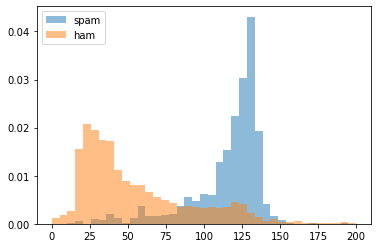

In [87]:
bins = np.linspace(0, 200, 40)
pylab.hist(df[df['label'] == 'spam']['len'], bins, alpha=0.5, label='spam', density=True)
pylab.hist(df[df['label'] == 'ham']['len'], bins, alpha=0.5, label='ham', density=True)
pylab.legend(loc='upper left')
pylab.show()

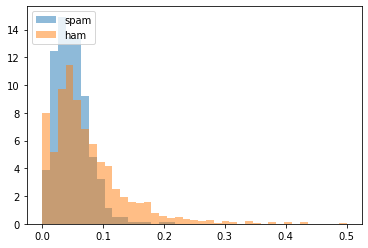

In [88]:
bins = np.linspace(0, .5, 40)
pylab.hist(df[df['label'] == 'spam']['punc_ratio'], bins, alpha=0.5, label='spam', density=True)
pylab.hist(df[df['label'] == 'ham']['punc_ratio'], bins, alpha=0.5, label='ham', density=True)
pylab.legend(loc='upper left')
pylab.show()

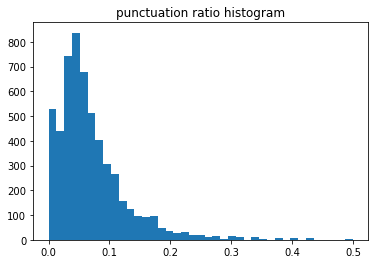

In [90]:
bins = np.linspace(0, .5, 40)
pylab.hist(df['punc_ratio'], bins)
pylab.title('punctuation ratio histogram')
pylab.show()

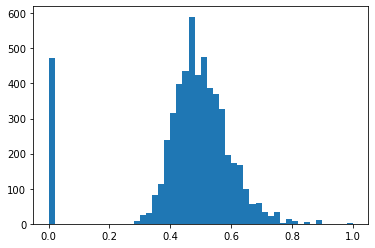

In [94]:
pylab.hist(df['punc_ratio'] ** (1/4), bins=50)
pylab.show()

In [96]:
df.head()

,label,message,len,punc_ratio
0,ham,"Go until jurong point, crazy.. Available only ...",92,0.097826
1,ham,Ok lar... Joking wif u oni...,24,0.250000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,0.046875
3,ham,U dun say so early hor... U c already then say...,39,0.153846
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,0.040816


In [97]:
df['punc_ratio'] = df['punc_ratio'] **.25

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer=clean_text)

vals = tfidf.fit_transform(df['message'])

In [100]:
Xdf = pd.concat([df['len'], df['punc_ratio'], pd.DataFrame(vals.toarray())], axis=1)

In [101]:
Xdf.head()

,len,punc_ratio,0,1,2,3,4,5,6,7,...,8099,8100,8101,8102,8103,8104,8105,8106,8107,8108
0,92,0.559260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,0.465302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,0.626284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,0.449478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

In [105]:
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, Xdf, df['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.97488789, 0.97668161, 0.97576302, 0.96678636, 0.97127469])

In [106]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(Xdf, df['label'], test_size=0.2)

In [108]:
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [110]:
y_pred = rf_model.predict(X_test)

In [112]:
score(y_test, y_pred, pos_label='spam', average='binary')

(1.0, 0.5973154362416108, 0.7478991596638656, None)

In [113]:
from sklearn.model_selection import GridSearchCV
    

In [115]:
rf = RandomForestClassifier()
params = {'n_estimators': [10, 100, 200],
         'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, params, cv=4, n_jobs=-1)
gs_fit = gs.fit(X_train, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
6,1.530452,0.074399,0.205838,0.026222,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.969507,0.977558,0.969479,0.973968,0.972628,0.003382,1
8,18.238089,0.334779,0.256961,0.031281,90,200,"{'max_depth': 90, 'n_estimators': 200}",0.970404,0.974865,0.971275,0.973968,0.972628,0.001843,2
10,9.659506,0.265377,0.146414,0.021270,None,100,"{'max_depth': None, 'n_estimators': 100}",0.968610,0.973968,0.973968,0.970377,0.971731,0.002323,3
11,13.277492,0.345279,0.146660,0.008112,None,200,"{'max_depth': None, 'n_estimators': 200}",0.969507,0.974865,0.971275,0.969479,0.971282,0.002193,4
7,9.422658,0.454439,0.249350,0.039557,90,100,"{'max_depth': 90, 'n_estimators': 100}",0.968610,0.972172,0.970377,0.973070,0.971057,0.001714,5


In [116]:
from sklearn.ensemble import GradientBoostingClassifier

In [119]:
gb = GradientBoostingClassifier()
params = {'n_estimators': [100, 150],
         'max_depth': [7, 11, 15],
         'learning_rate': [0.1]}

gs = GridSearchCV(gb, params, cv=4, n_jobs=-1)
gs_fit = gs.fit(X_train, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
1,148.857493,1.439924,0.187782,0.016047,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.968610,0.962298,0.962298,0.970377,0.965896,0.003652,1
0,97.200833,1.268462,0.173445,0.006908,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.965022,0.962298,0.964093,0.970377,0.965448,0.003010,2
2,142.251182,0.768336,0.182370,0.011534,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.967713,0.963196,0.959605,0.967684,0.964549,0.003395,3
3,219.987944,2.211344,0.181641,0.047882,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.968610,0.962298,0.958707,0.968582,0.964549,0.004241,4
5,228.542408,3.771459,0.100661,0.009763,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.971300,0.959605,0.959605,0.963196,0.963427,0.004776,5


In [126]:
import gensim.downloader as w2v
import gensim
wiki_embeddings = w2v.load('glove-wiki-gigaword-100')

In [127]:
wiki_embeddings.most_similar('truck')

[('car', 0.8597878217697144),
 ('trucks', 0.8078931570053101),
 ('vehicle', 0.7879197001457214),
 ('bus', 0.7633008360862732),
 ('pickup', 0.7436763644218445),
 ('tractor', 0.7433986663818359),
 ('cars', 0.741030752658844),
 ('driver', 0.7295382618904114),
 ('parked', 0.7291535139083862),
 ('lorry', 0.7239130735397339)]

In [128]:
df.head()

,label,message,len,punc_ratio
0,ham,"Go until jurong point, crazy.. Available only ...",92,0.559260
1,ham,Ok lar... Joking wif u oni...,24,0.707107
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,0.465302
3,ham,U dun say so early hor... U c already then say...,39,0.626284
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,0.449478


In [130]:
df['clean_message'] = df['message'].apply(lambda x: gensim.utils.simple_preprocess(x))

In [132]:
df.head()

,label,message,len,punc_ratio,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",92,0.559260,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,24,0.707107,"[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,0.465302,"[free, entry, in, wkly, comp, to, win, fa, cup..."
3,ham,U dun say so early hor... U c already then say...,39,0.626284,"[dun, say, so, early, hor, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,0.449478,"[nah, don, think, he, goes, to, usf, he, lives..."


In [133]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_message'], df['label'], test_size=0.2)

In [135]:
w2v_model = gensim.models.Word2Vec(X_train, size=100, window=5, min_count=2)

In [138]:
w2v_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in w2v_model.wv.index2word]) for ls in X_train])

In [142]:
w2v_vect_avg = []

for vect in w2v_vect:
    if(len(vect) != 0):
        w2v_vect_avg.append(vect.mean(axis=0))
    else:
        w2v_vect_avg.append(np.zeros(100))

In [146]:
tagged_docs = [gensim.models.doc2vec.TaggedDocument(v, [i]) for i, v in enumerate(X_train)]

In [147]:
d2v_model = gensim.models.Doc2Vec(tagged_docs, vector_size=100, window=5, min_count=2)

In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('data/SMSSpamCollection', delimiter='\t', header=None)
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['label'] = np.where(df['label'] == 'spam', 1, 0)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2)

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [7]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [8]:
X_train_padded = pad_sequences(X_train_seq, 50)
X_test_padded = pad_sequences(X_test_seq, 50)

In [9]:
def cross_entropy_loss(logit_pred, label):
    # Convert labels to int 64 for tf cross-entropy function.
    label = tf.cast(label, tf.int64)
    # Apply softmax to logits and compute cross-entropy.
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=label, logits=logit_pred)
    # Average loss across the batch.
    return tf.reduce_mean(loss)

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

def step_once(model, loss_f, x, y):
    with tf.GradientTape() as g:
        # Forward pass.
        pred = model.call(x, is_training=True)
        # Compute loss.
        loss = loss_f(pred, y)
        
    trainable_variables = model.trainable_variables

    # Compute gradients
    gradients = g.gradient(loss, trainable_variables)
    
    # Update weights
    optimizer.apply_gradients(zip(gradients, trainable_variables))

def optimize(model, optimizer, train_data, x_val, y_val, training_steps, loss_f=cross_entropy_loss, metric_f=accuracy, metric_name="accuracy", log_file="log.csv", model_file="nn.chkp"):
    best_loss = float("inf")
    log = pd.DataFrame(columns=['step', 'metric', 'value'])
    for i, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
        # Run the optimization to update W and b values.
        step_once(model, loss_f, batch_x, batch_y)

        if i % display_step == 0:
            pred = model(batch_x, is_training=True)
            loss = loss_f(pred, batch_y)
            metric = metric_f(pred, batch_y)
            pred_val = model(x_val, is_training=True)
            val_loss = loss_f(pred_val, y_val)
            metric_val = metric_f(pred_val, y_val)
            print("step: %i, loss: %f, %s: %f, Validation loss: %f, %s: %f" % (i, loss.numpy(), metric_name, metric.numpy(), val_loss.numpy(), metric_name, metric_val.numpy()))
            log = log.append({"step":i, "metric":"train_loss", "value": loss.numpy()}, ignore_index=True)
            log = log.append({"step":i, "metric":'train_' + metric_name, "value": metric.numpy()}, ignore_index=True)
            log = log.append({"step":i, "metric":"val_loss", "value": val_loss.numpy()}, ignore_index=True)
            log = log.append({"step":i, "metric":'val_' + metric_name, "value": metric_val.numpy()}, ignore_index=True)
            if(val_loss < best_loss):
                best_loss = val_loss
                model.save_weights(model_file)
    log.to_csv(log_file, index=False)

In [10]:
import tensorflow as tf
from tensorflow.keras import Model, layers

In [13]:
# %%time
class LSTM(Model):
    # Set layers.
    def __init__(self):
        super(LSTM, self).__init__()
        # RNN (LSTM) hidden layer.
        self.embedding = layers.Embedding(len(tokenizer.index_word) + 1, 32)
        self.lstm_layer = layers.GRU(units=32, dropout=0, recurrent_dropout=0)
        self.flatten = layers.Flatten()
        self.hidden = layers.Dense(32, activation='relu')
        self.out = layers.Dense(2)
        

    # Set forward pass.
    def call(self, x, is_training=False):
        # LSTM layer.
        x = self.embedding(x)
        x = self.lstm_layer(x)
        x = self.flatten(x)
        # Output layer (num_classes).
        x = self.hidden(x)
        x = self.out(x)
        if not is_training:
            # tf cross entropy expect logits without softmax, so only
            # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x
    


# Training parameters.
learning_rate = 0.2
training_steps = 2000
batch_size = 32
display_step = 100
prefetch = 1

seed = 1000

log_file='logs/rnn_spam.csv'
model_file = 'models/rnn_spam.chkp'

train_data = tf.data.Dataset.from_tensor_slices((X_train_padded, y_train))
train_data = train_data.repeat().shuffle(seed).batch(batch_size).prefetch(prefetch)

model = LSTM()

optimizer = tf.optimizers.SGD(learning_rate)

optimize(model, optimizer, train_data, X_test_padded, y_test, training_steps, loss_f=cross_entropy_loss, metric_f=accuracy, metric_name="accuracy", log_file=log_file, model_file=model_file)

step: 100, loss: 0.167832, accuracy: 0.968750, Validation loss: 0.436857, accuracy: 0.849327
step: 200, loss: 0.365314, accuracy: 0.875000, Validation loss: 0.412929, accuracy: 0.849327
step: 300, loss: 0.277026, accuracy: 0.906250, Validation loss: 0.369337, accuracy: 0.849327
step: 400, loss: 0.256596, accuracy: 0.906250, Validation loss: 0.182390, accuracy: 0.917489
step: 500, loss: 0.023903, accuracy: 1.000000, Validation loss: 0.111758, accuracy: 0.967713
step: 600, loss: 0.099196, accuracy: 0.968750, Validation loss: 0.079543, accuracy: 0.971300
step: 700, loss: 0.008942, accuracy: 1.000000, Validation loss: 0.062970, accuracy: 0.980269
step: 800, loss: 0.008135, accuracy: 1.000000, Validation loss: 0.060789, accuracy: 0.983856
step: 900, loss: 0.014274, accuracy: 1.000000, Validation loss: 0.057015, accuracy: 0.982063
step: 1000, loss: 0.002790, accuracy: 1.000000, Validation loss: 0.060793, accuracy: 0.982960
step: 1100, loss: 0.010486, accuracy: 1.000000, Validation loss: 0.06

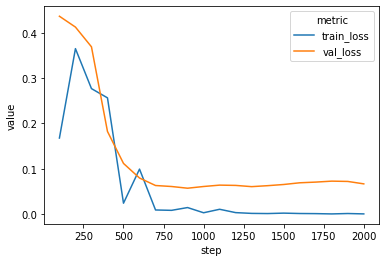

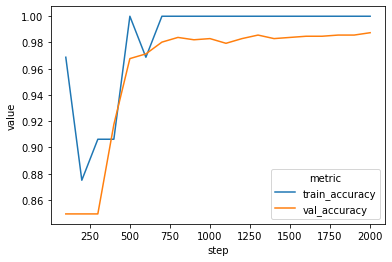

In [17]:
import seaborn as sns
import pylab as plt
training_trajectory = pd.read_csv(log_file)
training_trajectory.head()
for x in set(map(lambda x: x.split('_')[1], training_trajectory['metric'].unique())):
    data = training_trajectory[training_trajectory['metric'].str.contains(x)]
    sns.lineplot(data=data, x='step', y='value', hue='metric')
    plt.show()